In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("data/Social_Network_Ads.csv")
df.head()
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
363,15768293,Female,42,79000,0
151,15576219,Male,41,45000,0
274,15692819,Female,57,26000,1
202,15735549,Female,39,134000,1
227,15685346,Male,56,133000,1


In [3]:
# df.iloc[:6,2:]
df = df.iloc[:, 2:]
df.sample(4)

,Age,EstimatedSalary,Purchased
360,43,129000,1
306,51,134000,0
366,58,47000,1
16,47,25000,1


In [4]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=["Purchased"]),df["Purchased"],test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 2)
(120, 2)
(280,)
(120,)


In [5]:
X_train.head(5)

,Age,EstimatedSalary
157,29,75000
109,38,80000
17,45,26000
347,54,108000
24,46,23000


#### Standard Scalar

In [6]:
scalar = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scalar.fit(X_train)
# transform train and test sets
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [7]:
print(scalar.mean_, scalar.var_)

[3.75750000e+01 7.05892857e+04] [1.03587232e+02 1.14838489e+09]


In [8]:
X_train_scaled[:5]
print(X_train_scaled[:5])
# since X_train_scaled is numpy array we will convert it into dataframe for clear visualization
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head(5)


[[-0.84252154  0.1301563 ]
 [ 0.04175763  0.2777019 ]
 [ 0.72953032 -1.31579061]
 [ 1.61380949  1.10395728]
 [ 0.82778356 -1.40431797]]


,Age,EstimatedSalary
0,-0.842522,0.130156
1,0.041758,0.277702
2,0.729530,-1.315791
3,1.613809,1.103957
4,0.827784,-1.404318


In [9]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.head(5)

,Age,EstimatedSalary
0,0.827784,-1.433827
1,2.105076,0.513775
2,-0.940775,-0.784626
3,1.024290,0.749848
4,-0.842522,-1.256772


In [10]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.6,70589.3
std,10.2,33948.5
min,18.0,15000.0
25%,30.0,44000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


In [11]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


### Effect of Scaling

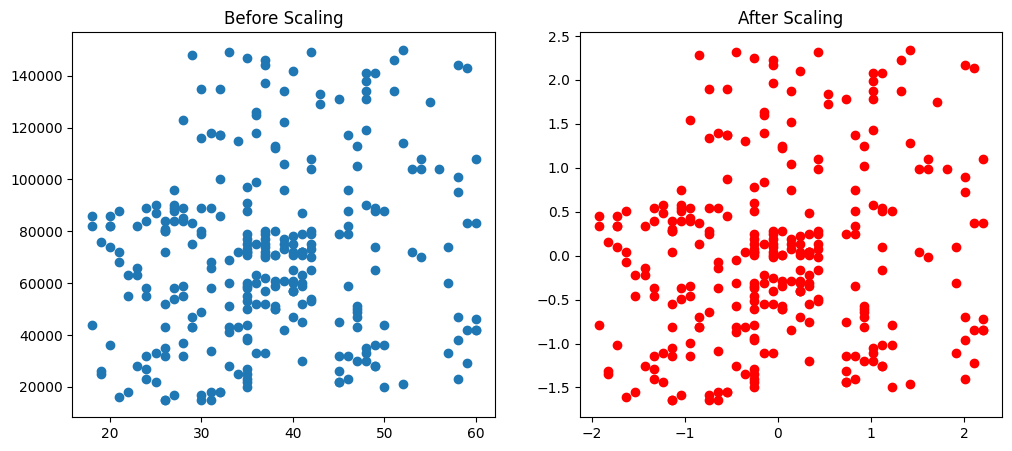

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

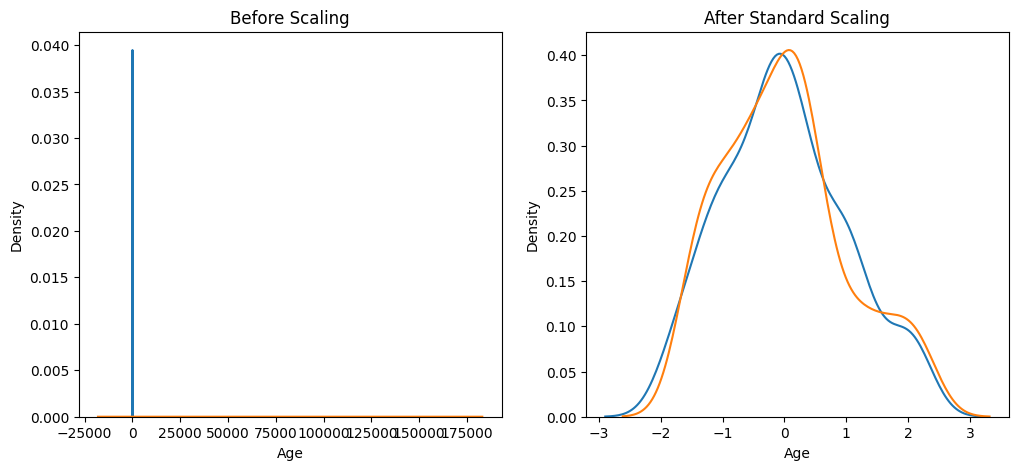

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

### Comparison of Distributions

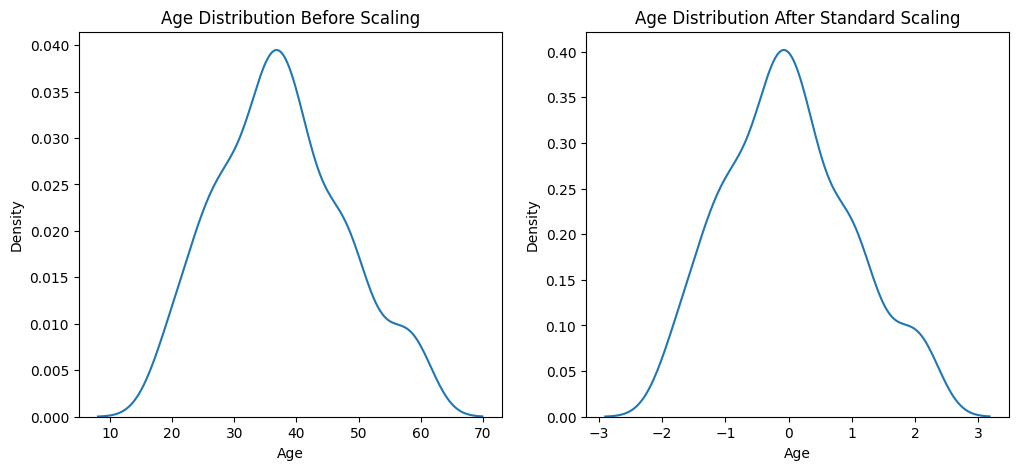

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

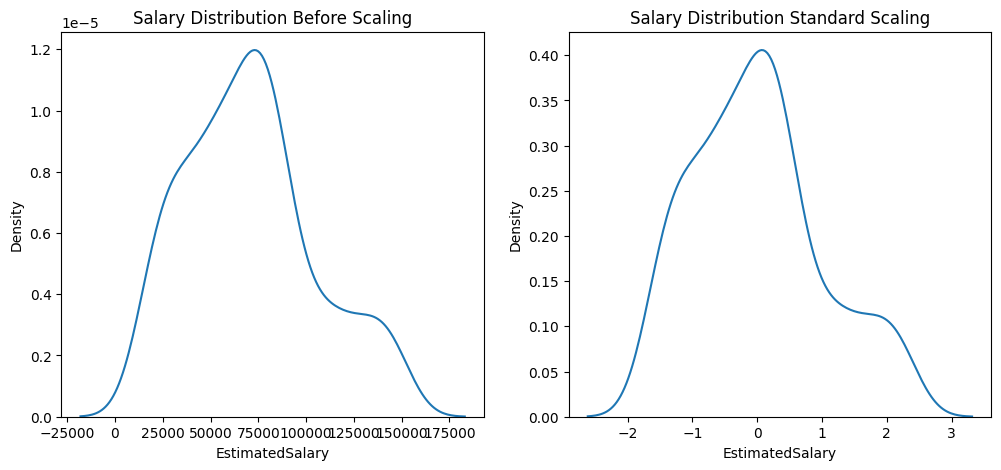

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

### Why scaling is important

In [16]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [17]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [19]:
print("Actual",accuracy_score(y_test, y_pred))
print("Scaled",accuracy_score(y_test, y_pred_scaled))

Actual 0.85
Scaled 0.85


### Effect of Outlier

In [23]:
new_df = pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})
result_df = pd.concat([df,new_df],ignore_index=True)
result_df.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


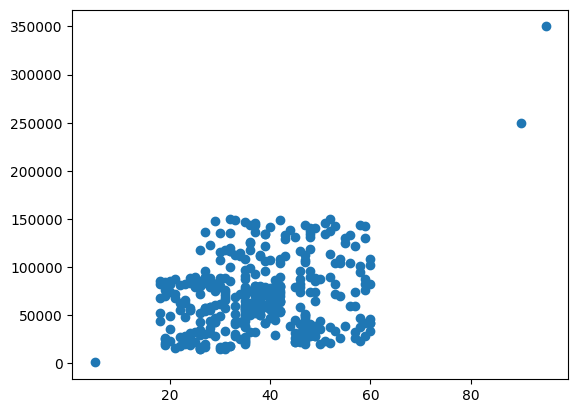

In [24]:
plt.scatter(result_df['Age'], result_df['EstimatedSalary'])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(result_df.drop('Purchased', axis=1),
                                                    result_df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [27]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

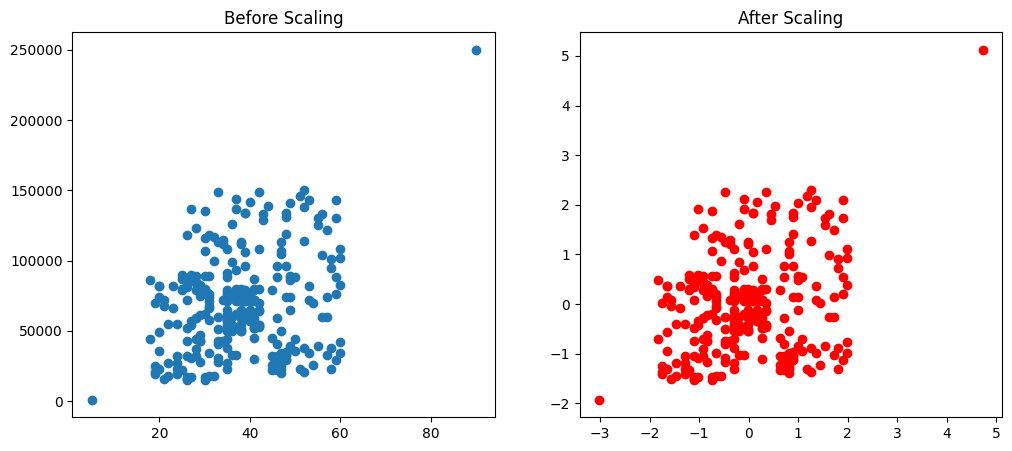

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()